In [103]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition, stl_decomposition
from jcopml.time_series import auto_ets
from luwiji.time_series import illustration

## Error-Trend-Seasonal (ETS) Smoothing Method

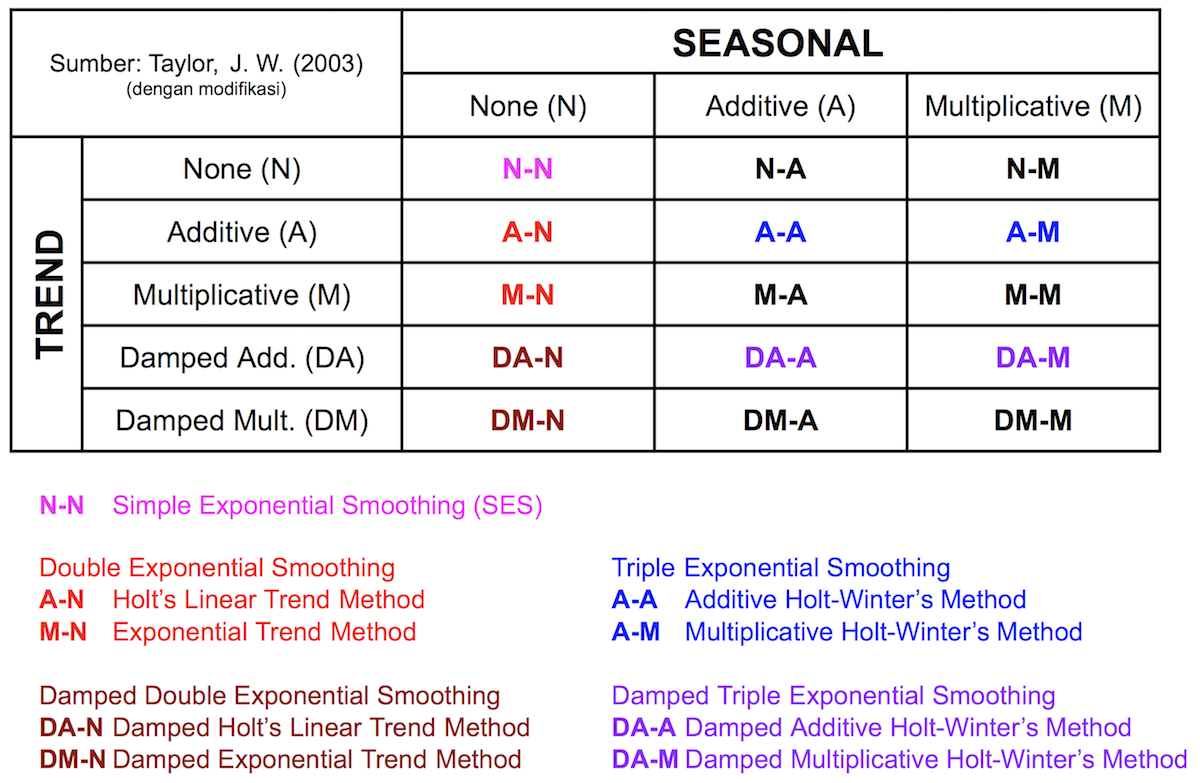

In [8]:
illustration.ets_model

## Exercise 1 : Cheese Production Data

In [10]:
df = pd.read_csv('data/cheese_fred.csv', index_col='date', parse_dates=['date'])
series = df.total_cheese_production
X_train, X_test = series[:-25], series[-25:]

<Axes: xlabel='date'>

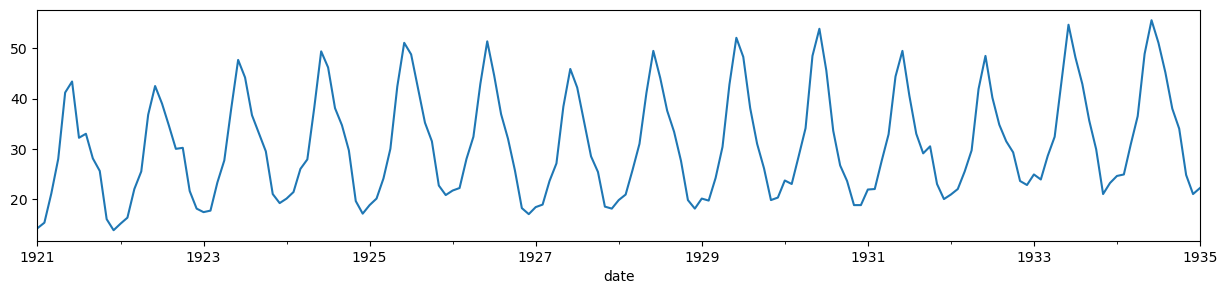

In [11]:
series.plot(figsize=(15, 3))

In [15]:
# Training
es = ExponentialSmoothing(X_train, seasonal='add', seasonal_periods=12)
model = es.fit(optimized=True)

c:\Users\Itzzgvry\anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [17]:
# forecast
pred = model.predict(len(X_train)-10, len(X_train)+50)

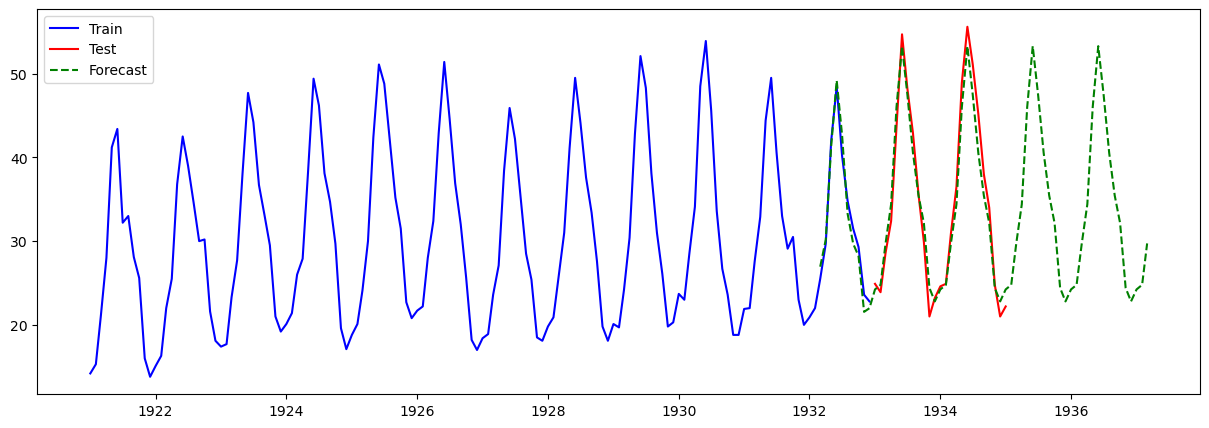

In [18]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()
plt.show()

## Exercise 2 : Airline Passenger Data

In [21]:
df = pd.read_csv('data/airline.csv', index_col='Date', parse_dates=['Date'])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]

<Axes: xlabel='Date'>

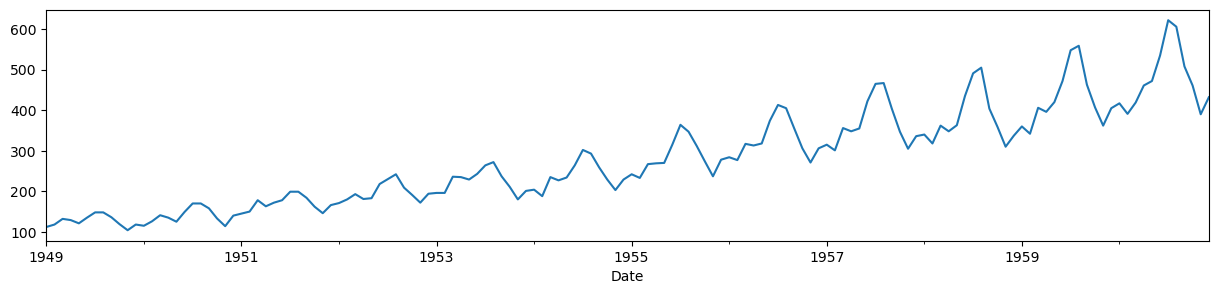

In [22]:
series.plot(figsize=(15, 3))

In [23]:
# Training
es = ExponentialSmoothing(X_train, trend='add', seasonal='mul', seasonal_periods=12)
model = es.fit(optimized=True)

c:\Users\Itzzgvry\anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [24]:
# forecast
pred = model.predict(len(X_train)-10, len(X_train)+50)

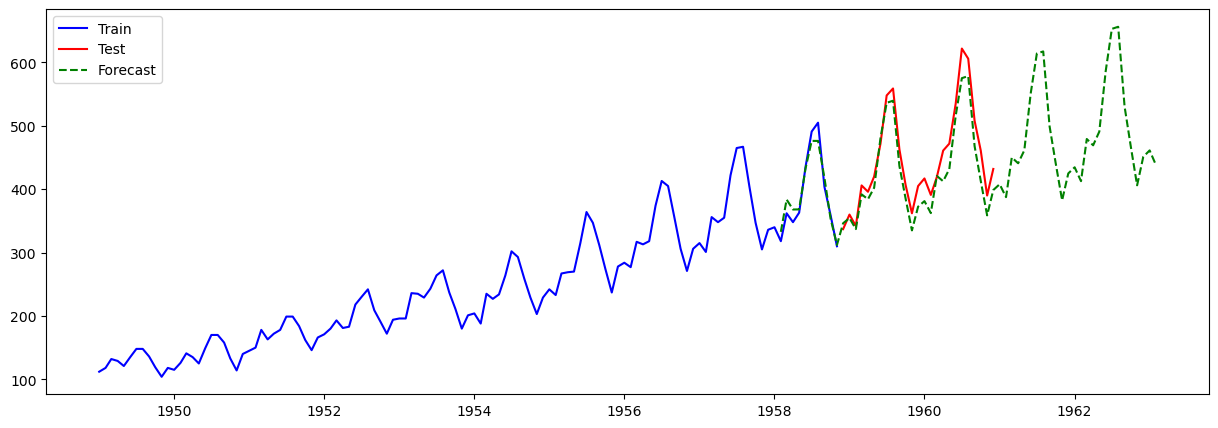

In [25]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()
plt.show()

## Exercise 3 Christmas Search Interest

In [45]:
df = pd.read_csv('data/christmas.csv', index_col='date', parse_dates=['date'])
series = df.interest
X_train, X_test = series[:-25], series[-25:]

<Axes: xlabel='date'>

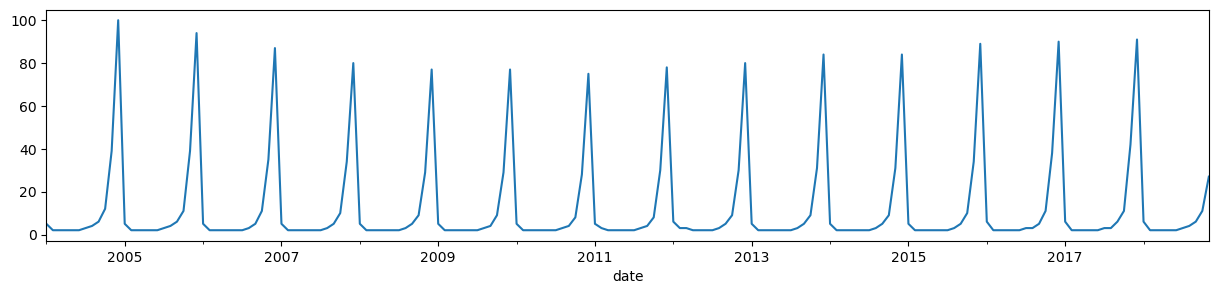

In [46]:
series.plot(figsize=(15, 3))

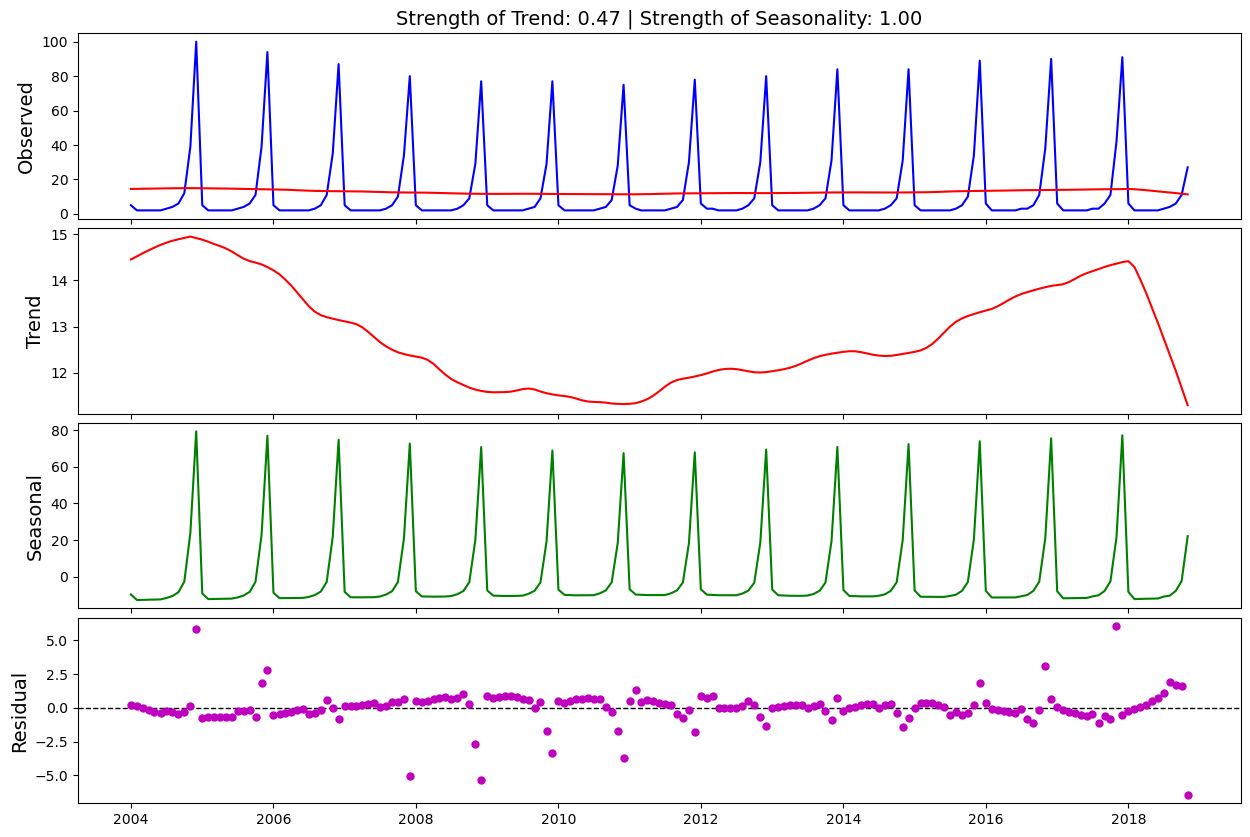

In [47]:
components = stl_decomposition(series, plot=True)

In [54]:
# Training
es = ExponentialSmoothing(X_train, trend='add', damped=True, seasonal='add', seasonal_periods=12, use_boxcox=True)
model = es.fit(optimized=True)

C:\Users\Itzzgvry\AppData\Local\Temp\ipykernel_11528\2216288820.py:2: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(X_train, trend='add', damped=True, seasonal='add', seasonal_periods=12, use_boxcox=True)
c:\Users\Itzzgvry\anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
# forecast
pred = model.predict(len(X_train)-10, len(X_train)+50)

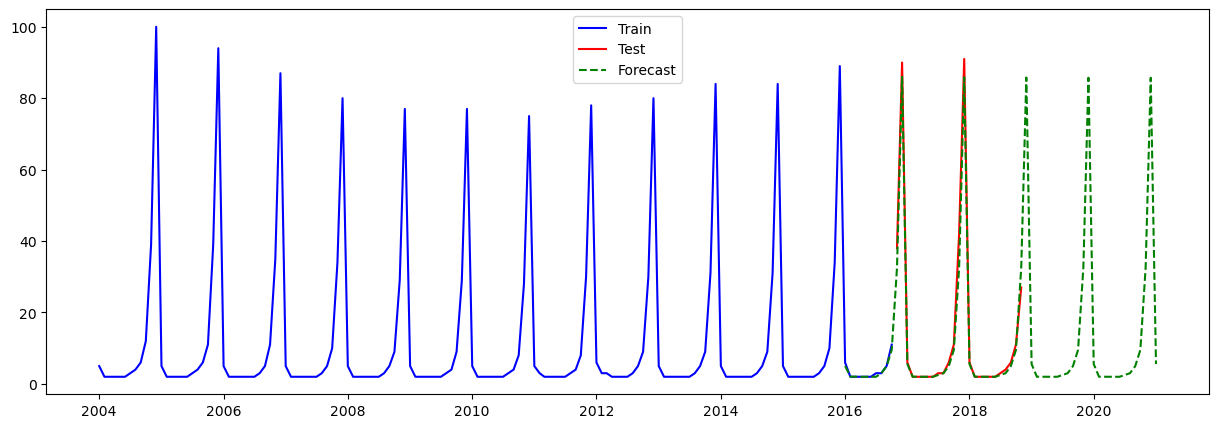

In [56]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()
plt.show()

## Exercise 4 : Champagne Series 

In [57]:
df = pd.read_csv('data/perrin_freres_champagne.csv', index_col='date', parse_dates=['date'])
series = df.sales
X_train, X_test = series[:-25], series[-25:]

<Axes: xlabel='date'>

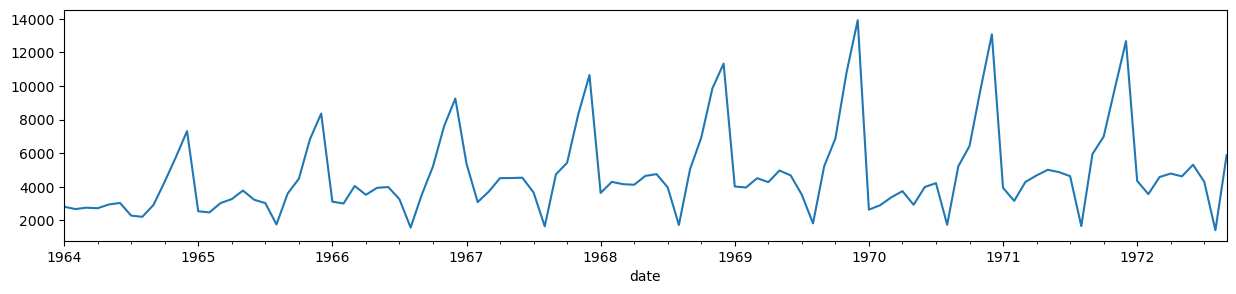

In [58]:
series.plot(figsize=(15, 3))

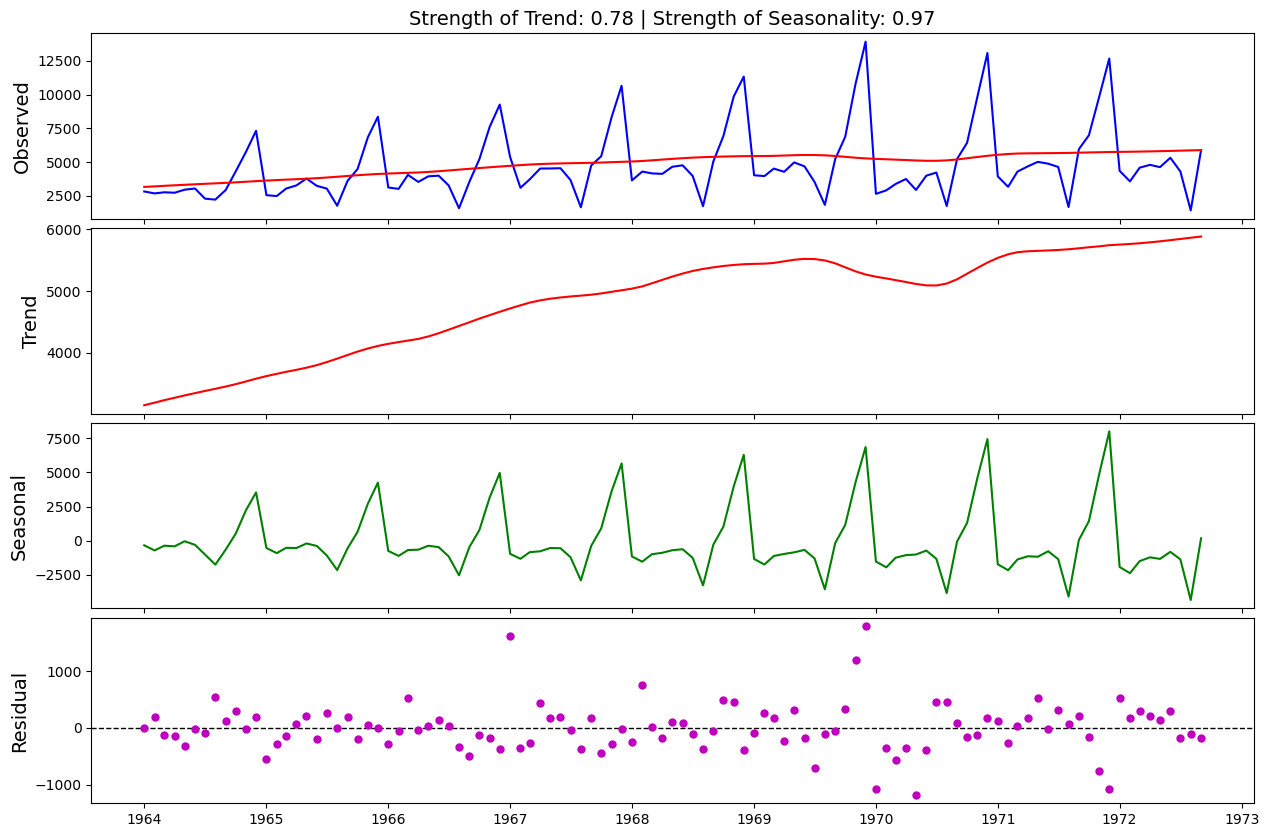

In [59]:
components = stl_decomposition(series, plot=True)

In [100]:
# Training
es = ExponentialSmoothing(X_train, trend='add', seasonal='mul', seasonal_periods=12)
model = es.fit(optimized=True)

c:\Users\Itzzgvry\anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [101]:
# forecast
pred = model.predict(len(X_train)-10, len(X_train)+50)

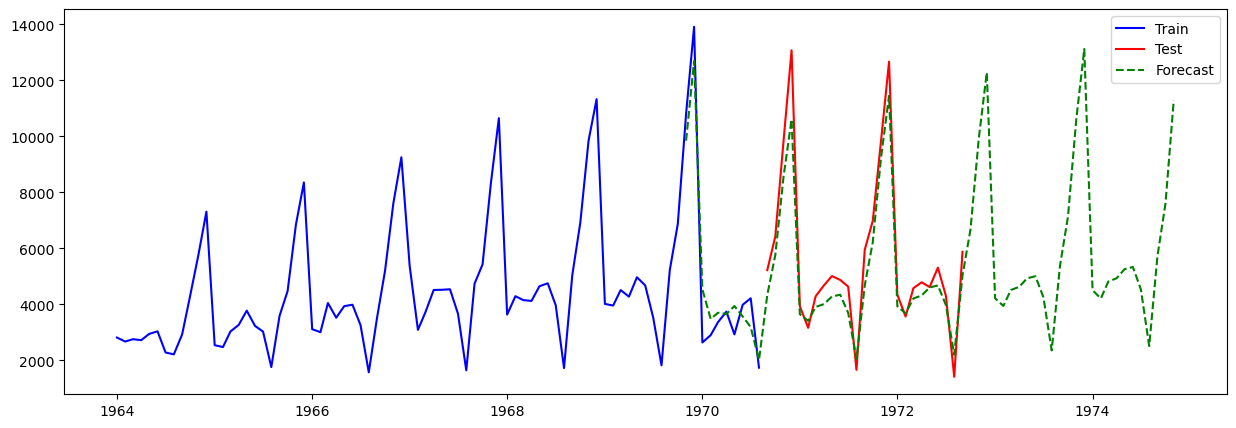

In [102]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()
plt.show()

## Auto ETS

In [104]:
df = pd.read_csv('data/daily_min_temp.csv', index_col='Date', parse_dates=['Date'])
df = df.resample(rule='M').mean()
series = df.Temp
X_train, X_test = series[:-25], series[-25:]

<Axes: xlabel='Date'>

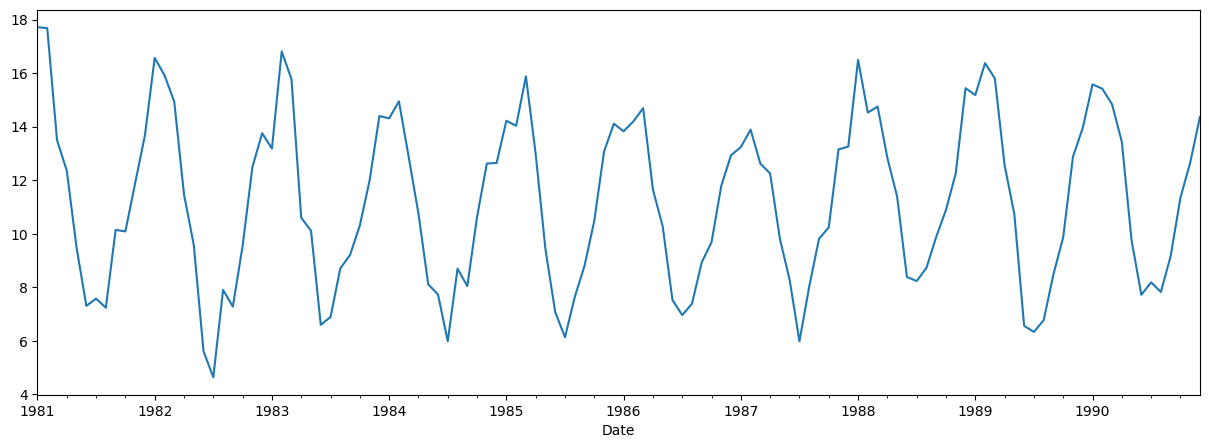

In [105]:
series.plot(figsize=(15, 5))

In [106]:
model, cv_result = auto_ets(X_train, scoring='mse')

  0%|          | 0/30 [00:00<?, ?it/s]

In [108]:
cv_result.head(5)

,trend,seasonal,damped,boxcox,mse_0,mse_1,mse_2,mse_3,mean_mse
3,None,add,False,False,2.489054,1.516050,0.725758,1.422363,1.538306
19,mul,mul,False,False,2.535091,1.660327,0.644695,2.043434,1.720887
2,None,add,False,True,3.586737,1.474026,0.745093,1.409604,1.803865
15,mul,add,False,False,3.079398,2.042022,0.808255,2.458670,2.097086
14,mul,add,False,True,3.355151,2.220276,0.888701,2.612922,2.269263


In [109]:
# forecast
pred = model.predict(len(X_train)-10, len(X_train)+50)

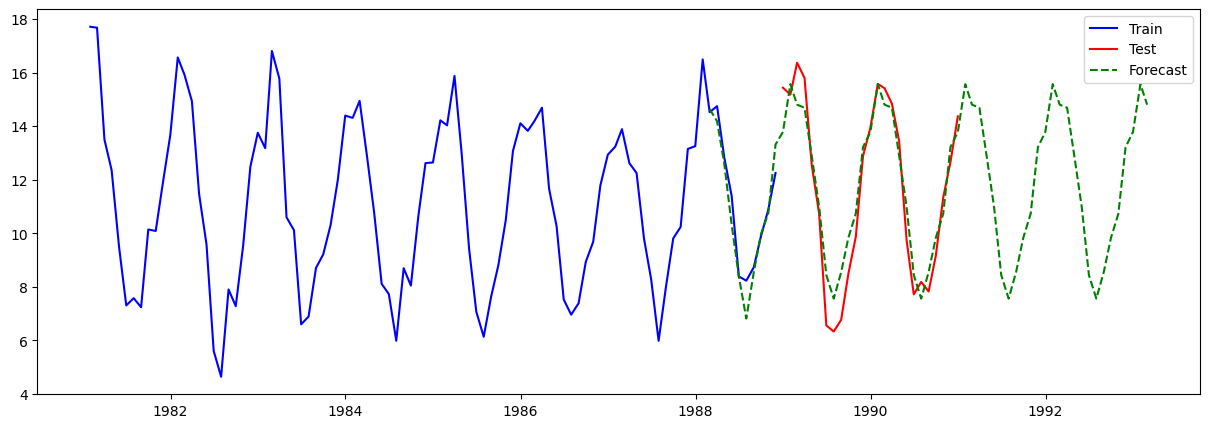

In [110]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()
plt.show()